In [1]:
import numpy as np
import pandas as  pd
import tensorflow as tf
from tensorflow import keras
#import keras
import matplotlib.pyplot as plt 
from tensorflow.keras import layers
from sklearn import *
import math
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from ipynb.fs.defs.UtilitiesVED import *
plt.rcParams["figure.figsize"] = (20,10)
tf.autograph.set_verbosity(0)



## Import Data


In [2]:
X_train = pd.read_csv("../Data/data2UEjoint/X_train_joint.csv", index_col=0)
y_train = pd.read_csv("../Data/data2UEjoint/y_train_joint.csv", index_col=0)

X_test = pd.read_csv("../Data/data2UEjoint/X_valid_joint.csv", index_col=0)
y_test = pd.read_csv("../Data/data2UEjoint/y_valid_joint.csv", index_col=0)


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(708, 1280)
(708, 3840)
(472, 1280)
(472, 3840)


In [4]:
X_train = (X_train.to_numpy())
X_test = (X_test.to_numpy())
y_train = (y_train.to_numpy())
y_test = (y_test.to_numpy())

In [5]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_esc = scaler.transform(X_train)
X_test_esc = scaler.transform(X_test)

## Build the encoder


In [6]:
latent_dim = 100 # Latent Space dimension on the bottleneck
input_dim = X_train.shape[1]
ReLu = keras.layers.ReLU()

encoder_inputs = keras.Input(shape=( input_dim, ))
x = layers.Dense(309, activation=ReLu)(encoder_inputs)

z_mean = layers.Dense(latent_dim, name="z_mean")(x )
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x00000192A4C077C0>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1280)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 309)          395829      ['input_1[0][0]']                
                                                                                                  
 z_mean (Dense)                 (None, 100)          31000      

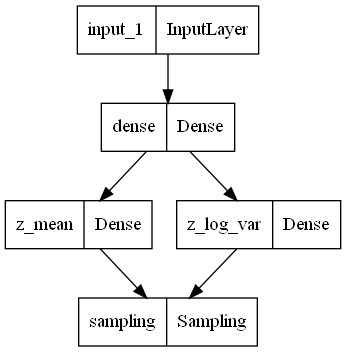

In [7]:
from keras.utils.vis_utils import plot_model
keras.utils.plot_model(encoder, to_file='encoder.png')

## Build the decoder


In [8]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(300,  activation=ReLu)(latent_inputs)
decoder_outputs = layers.Dense(input_dim * 3, activation="linear")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_1 (Dense)             (None, 300)               30300     
                                                                 
 dense_2 (Dense)             (None, 3840)              1155840   
                                                                 
Total params: 1,186,140
Trainable params: 1,186,140
Non-trainable params: 0
_________________________________________________________________


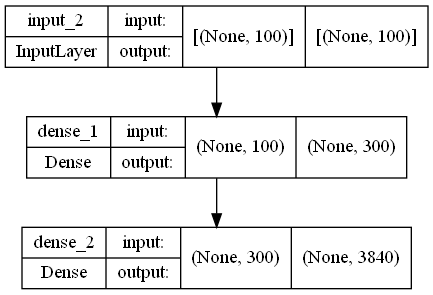

In [9]:
plot_model(decoder,  show_shapes=True, show_layer_names=True)

## Define the VAE as a Model with a custom train_step


## Train the VAE

In [10]:
vae = VAE(encoder, decoder,1)

In [11]:
vae.compile(optimizer=keras.optimizers.Adam())

In [12]:
es = keras.callbacks.EarlyStopping(
    monitor="MSE",
    patience=4,
)

In [13]:
history = vae.fit(X_train_esc, y_train, validation_data=(X_test_esc, y_test), epochs=35, batch_size=15)#, callbacks=es)

Epoch 1/35
48/48 [==============================] - 2s 23ms/step - loss: 52.5409 - MSE: 0.0460 - kl_loss: 37.1647 - val_loss_val: 37.8286 - val_MSE_val: 0.0339 - val_kl_loss_val: 37.7592
Epoch 2/35
48/48 [==============================] - 1s 15ms/step - loss: 12.7312 - MSE: 0.0261 - kl_loss: 11.5167 - val_loss_val: 31.4416 - val_MSE_val: 0.0275 - val_kl_loss_val: 31.3747
Epoch 3/35
48/48 [==============================] - 1s 14ms/step - loss: 6.3057 - MSE: 0.0231 - kl_loss: 6.0996 - val_loss_val: 27.7230 - val_MSE_val: 0.0255 - val_kl_loss_val: 27.6602
Epoch 4/35
48/48 [==============================] - 1s 15ms/step - loss: 4.0723 - MSE: 0.0220 - kl_loss: 4.0429 - val_loss_val: 25.2297 - val_MSE_val: 0.0244 - val_kl_loss_val: 25.1747
Epoch 5/35
48/48 [==============================] - 1s 15ms/step - loss: 2.8942 - MSE: 0.0213 - kl_loss: 2.8957 - val_loss_val: 23.2997 - val_MSE_val: 0.0235 - val_kl_loss_val: 23.2454
Epoch 6/35
48/48 [==============================] - 1s 15ms/step - loss

In [14]:

print('NRMSE', nrmse(vae.predict(X_test), y_test))
print('MAE', mae(vae.predict(X_test), y_test))
print('RMSE', math.sqrt(mse(vae.predict(X_test), y_test)))
print('MSE', mse(vae.predict(X_test), y_test))


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x00000192A4C3E1F0>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
NRMSE 1.0067045437536208
MAE 28.540891058368626
RMSE 3.126086592874419
MSE 9.760656702508404


# PLOTS


In [15]:
y_pred = vae.predict(X_test_esc)

In [16]:
samp_num = 1

In [17]:
name_ds = 'JointDS'

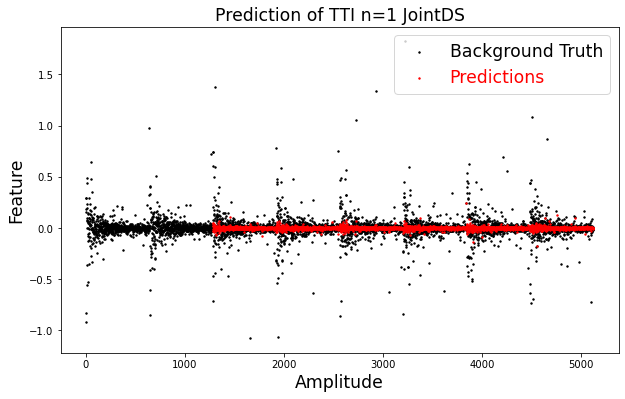

In [18]:
plot_1TTI(y_test, y_pred, X_test, samp_num, name_ds)



In [19]:
print(history.history.keys())

dict_keys(['loss', 'MSE', 'kl_loss', 'val_loss_val', 'val_MSE_val', 'val_kl_loss_val'])


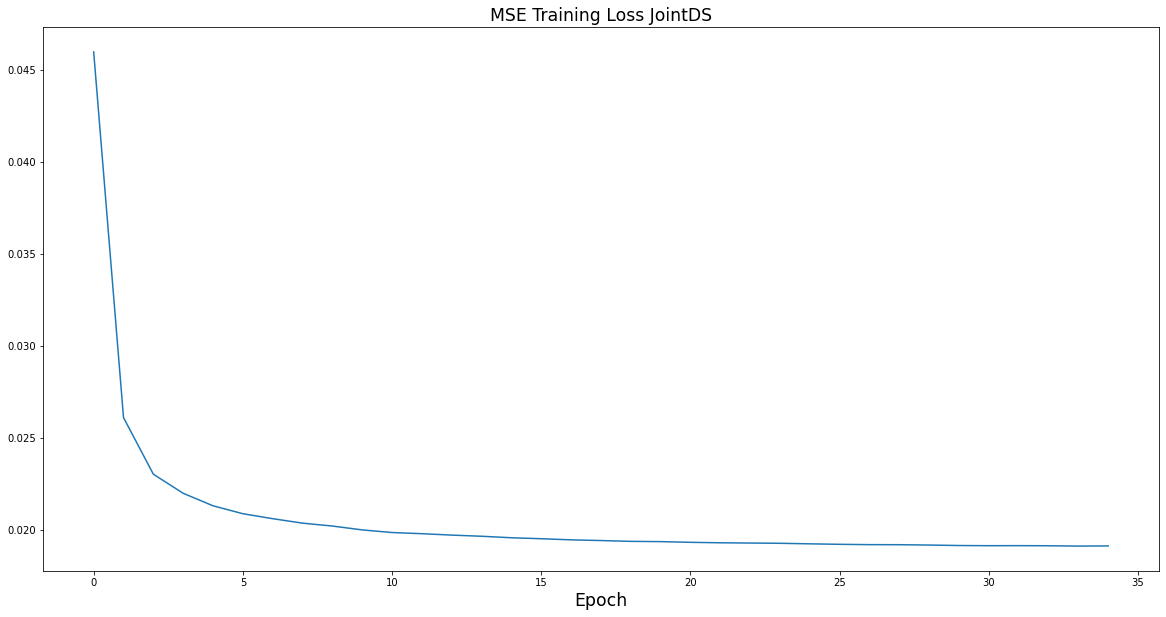

In [20]:
plot_mse_loss(history, name_ds)

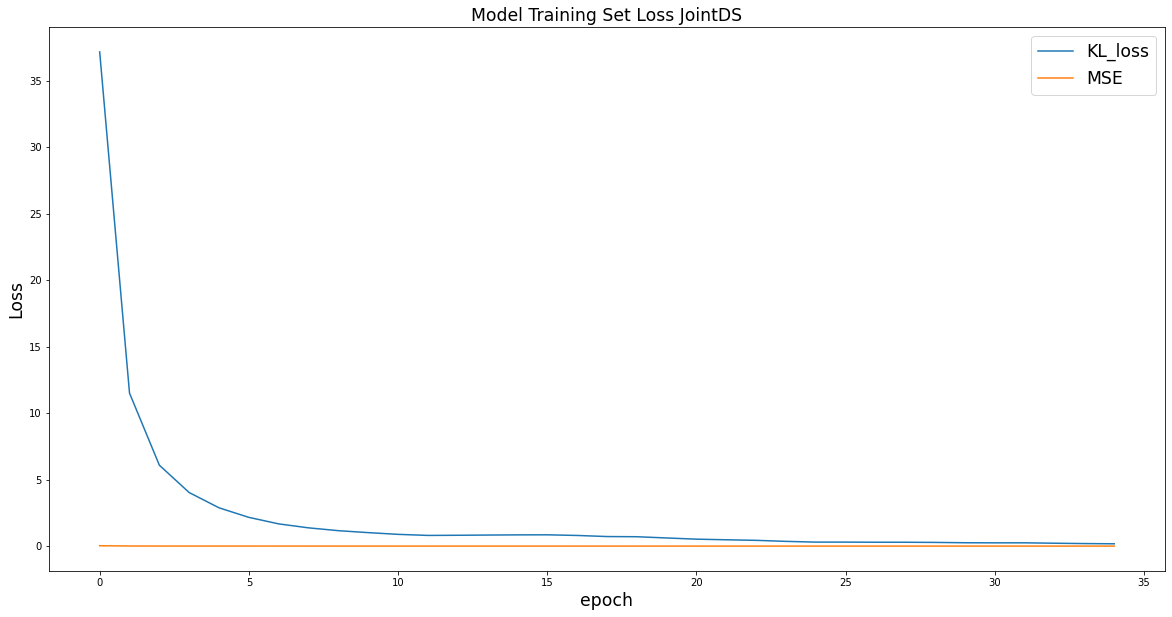

In [21]:
plot_kl_mse(history, name_ds)
    


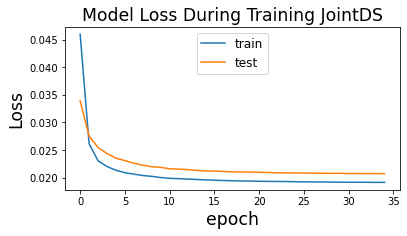

In [22]:
# summarize history for accuracy
plot_train_test(history, name_ds)


In [23]:
y_test.shape

(472, 3840)

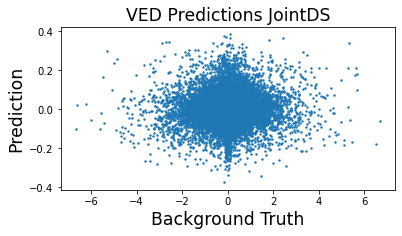

In [24]:
plot_pred_vs_true(y_pred, y_test, name_ds)

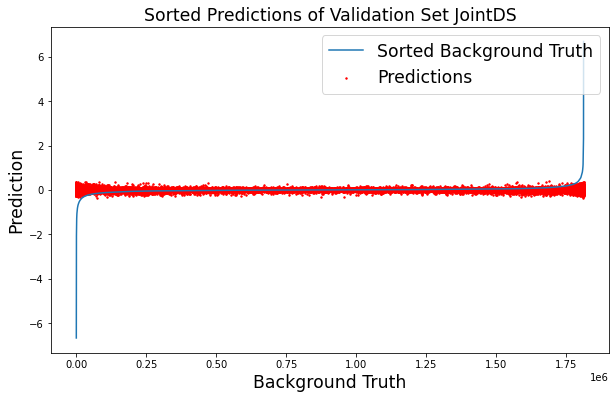

In [25]:
plot_sorted_vs_true(y_pred, y_test, name_ds)

    

# 

# Modeling

In [26]:
import scipy
data = pd.read_csv("../Data/data_UE1_600/data_unfold_UE1_600.csv", index_col=0).values

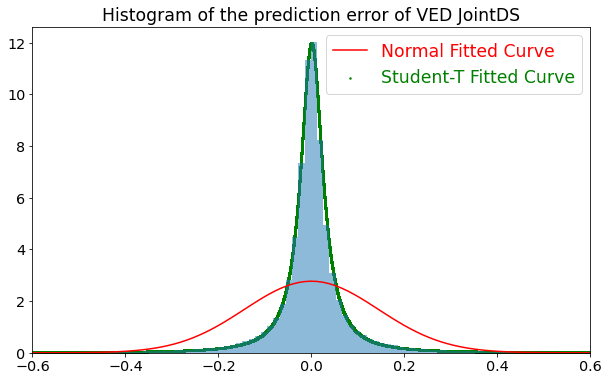

In [28]:
nbins = 1000
plot_modeling_prediction_error(data, y_test, y_pred, name_ds, nbins)

# Reconstruct the validation set

In [27]:
from matplotlib.pyplot import *


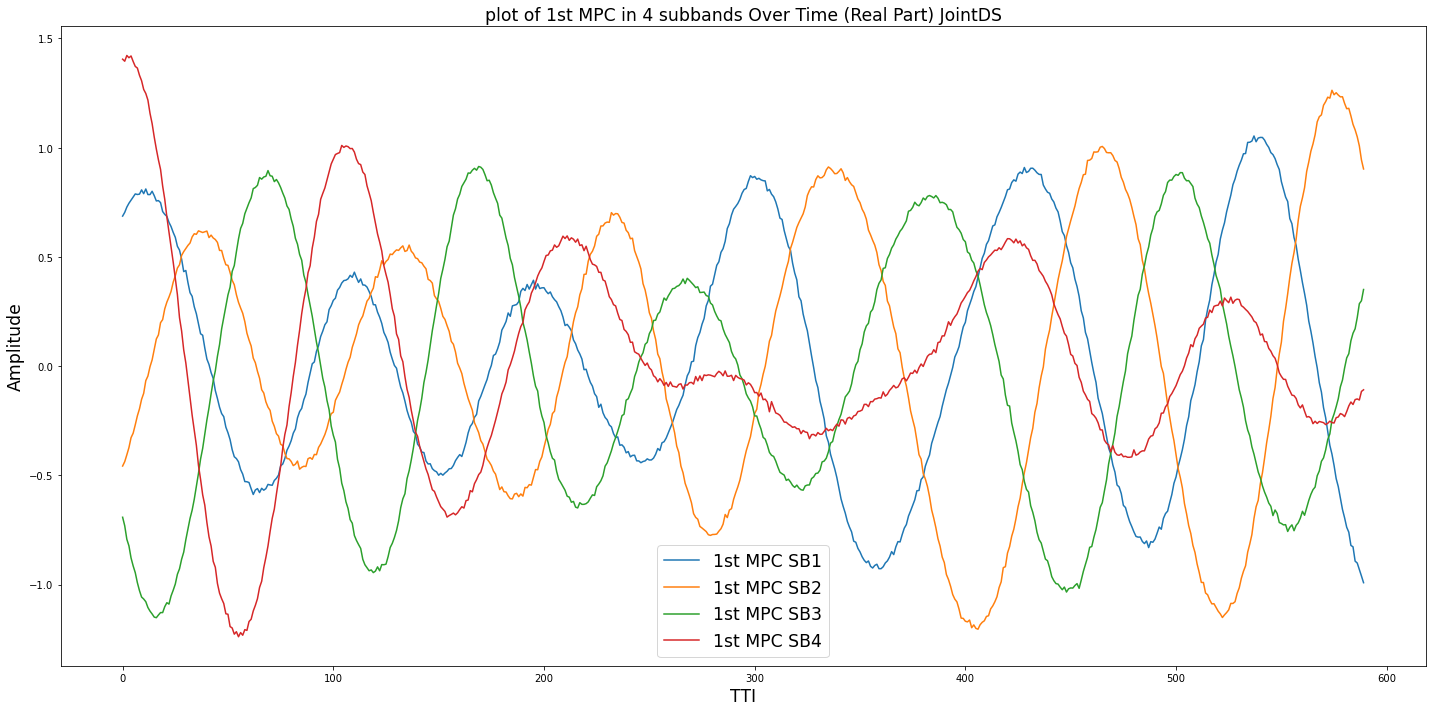

In [28]:
mpc=640

plot_MPC_overtime(data, mpc, name_ds, True)

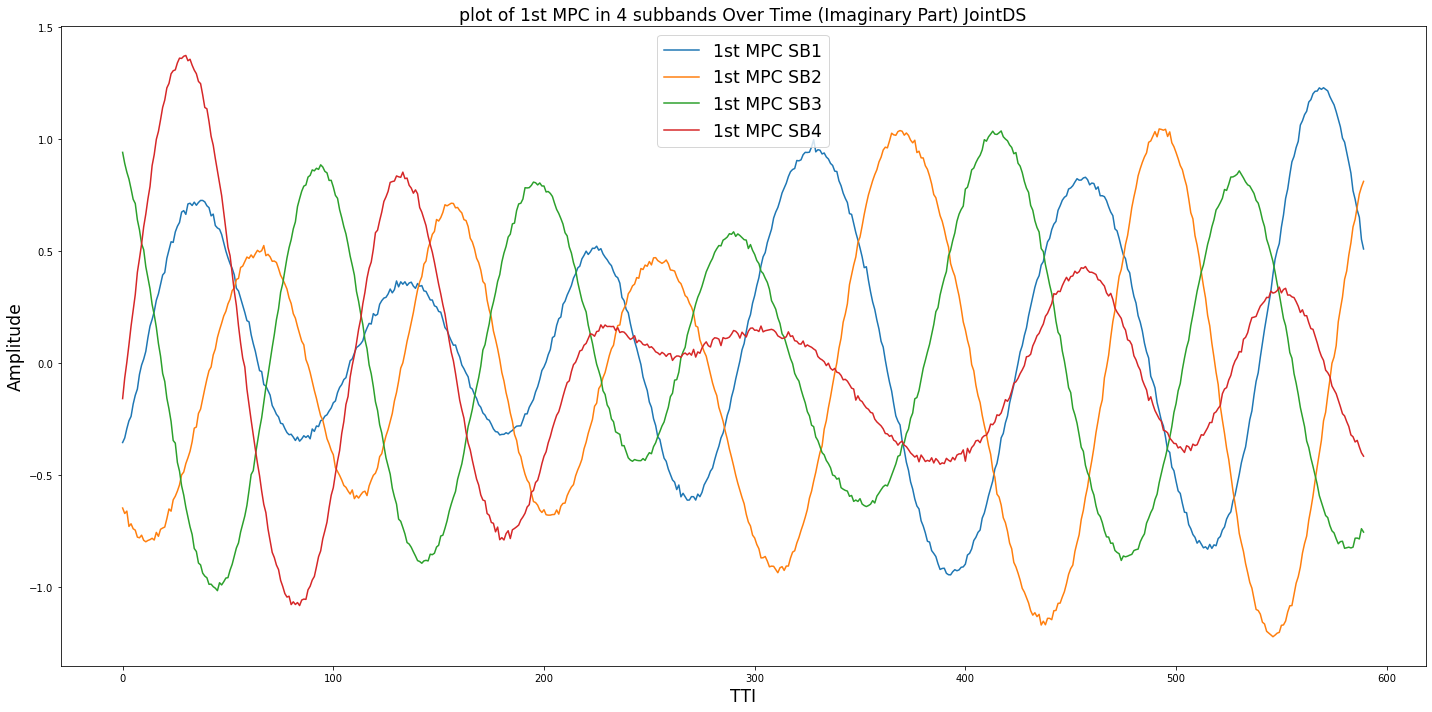

In [29]:
plot_MPC_overtime(data, mpc, name_ds, False)

# Reconstruct the validation set

In [30]:
y_pred = vae.predict(X_test_esc)


In [31]:
reconstruct_valid = reconstruct_validation(mpc, y_pred, X_test)


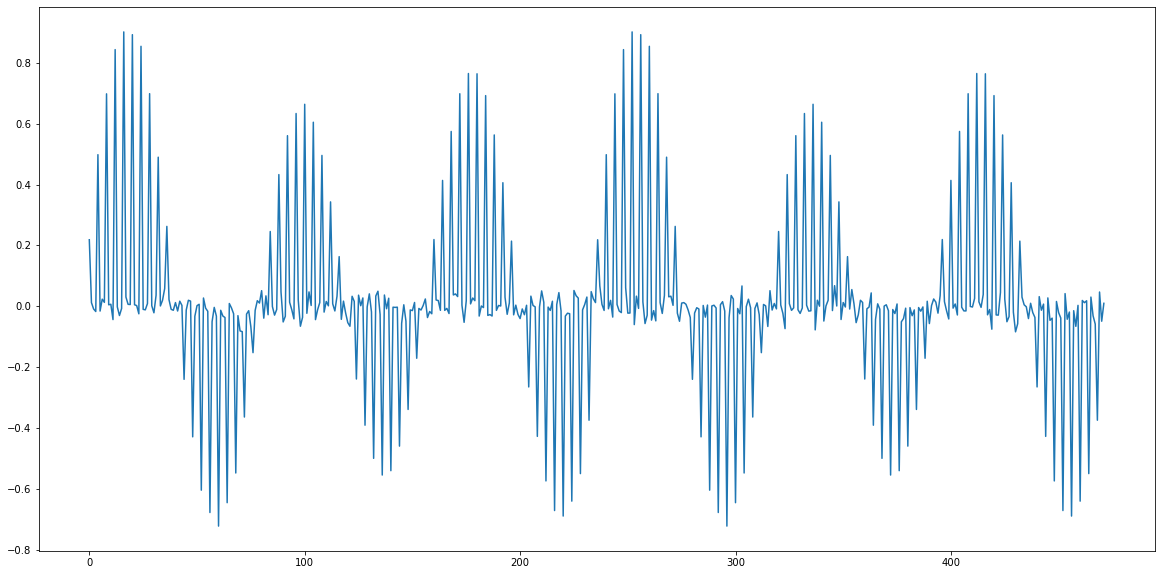

In [32]:
plot(reconstruct_valid[:,2])

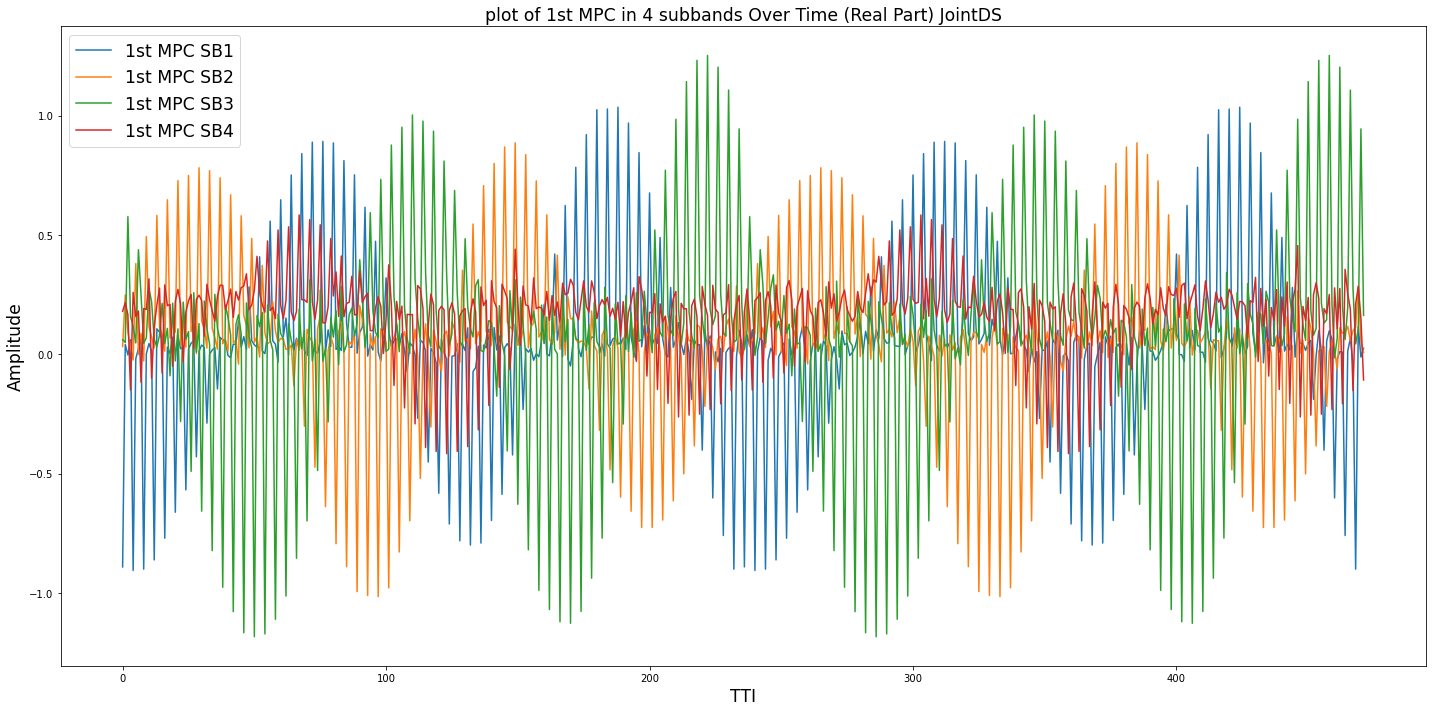

In [33]:
plot_MPC_overtime(reconstruct_valid, mpc, name_ds, True)
